# Clusters of region based on population.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('Population_Data.csv')
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,"6,43,596","28,83,782","4,40,445","2,03,151","27,63,718","72,515","35,27,378"
1,Region 17,9,"3,19,933","15,01,899","2,13,477","1,06,456","14,49,303","27,671",1821832
2,Region 12,4,"1,94,379","6,50,744","1,61,803","32,576","6,31,660","10,652",845123
3,Region 22,15,"1,07,360","4,70,708","85,343","22,017","4,50,267","6,389",578068
4,Region 23,13,"55,351","3,29,980","31,796","23,555","3,25,105","3,684",385331


In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB
None


1. From column Indians till Total Population seems to be numerical features but admitted as categorical features.
2. This is because the values are separated by comma, therefore they're showing object type.
3. We have to *convert* these values into numeric, since scikit-learn does not deal with categorical values. It takes all values numeric in nature.

In [4]:
numeric = ['Indians','Foreigners','Indian_Male','Indian_Female',
           'Foreigners_Male','Foreigners_Female','Total Population']

In [5]:
# function that replaces comma :
def cleaner(z):
    return z.replace(',','')

In [6]:
cleaner('133,22')

'13322'

In [7]:
for i in data[numeric]:
    data[i] = data[i].apply(cleaner)
    
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     object
 3   Foreigners          38 non-null     object
 4   Indian_Male         38 non-null     object
 5   Indian_Female       38 non-null     object
 6   Foreigners_Male     38 non-null     object
 7   Foreigners_Female   38 non-null     object
 8   Total Population    38 non-null     object
dtypes: int64(1), object(8)
memory usage: 2.8+ KB


In [9]:
# Now converting these objects datatypes into numeric.

data[numeric] = data[numeric].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Region              38 non-null     object
 1   Office Location Id  38 non-null     int64 
 2   Indians             38 non-null     int64 
 3   Foreigners          38 non-null     int64 
 4   Indian_Male         38 non-null     int64 
 5   Indian_Female       38 non-null     int64 
 6   Foreigners_Male     38 non-null     int64 
 7   Foreigners_Female   38 non-null     int64 
 8   Total Population    38 non-null     int64 
dtypes: int64(8), object(1)
memory usage: 2.8+ KB


### Check or survey :
1. Checking the sum of Indians & Foreigners actually make it to total population or not. 
2. If the total is accurate we'll get answer 0
3. Also checking total of Indian_Male, Inidan_Female, Foreigners_Male, Foreigners_Female adds up to the Total Population or nor.

In [10]:
data[['Indians','Foreigners']].sum().sum() - data['Total Population'].sum()

0

In [11]:
data[['Indian_Male','Indian_Female','Foreigners_Male','Foreigners_Female']].sum().sum() - data['Total Population'].sum()

-112859

### Insight :
1. Since the value we have got is negative that means, there are more people who refused / did not admitted as male or female.
2. As this new information can help us further.
3. We can put this information is new column called 'other' based on the population of the whole region.
4. other = who do not indetify themselves as male or female.

In [12]:
MF_sum = data['Indian_Male'] + data['Indian_Female'] + data['Foreigners_Male'] + data['Foreigners_Female']
data['other'] = data['Total Population'] - MF_sum
data.head()

,Region,Office Location Id,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,Total Population,other
0,Region 31,1,643596,2883782,440445,203151,2763718,72515,3527378,47549
1,Region 17,9,319933,1501899,213477,106456,1449303,27671,1821832,24925
2,Region 12,4,194379,650744,161803,32576,631660,10652,845123,8432
3,Region 22,15,107360,470708,85343,22017,450267,6389,578068,14052
4,Region 23,13,55351,329980,31796,23555,325105,3684,385331,1191


In [13]:
data['Region'].nunique(), data['Office Location Id'].nunique()

(38, 38)

### Note.
1. Before moving further we're deleting 'Region', 'Office Location Id' columns as they are not useful while clustering.
2. __Reason__ : All the values in these columns are unique w.r.t the region and hence there's no similarity in 2 region codes or location id.

3. Also dropping column Total Population as it already explained that it is the sum of indians & foreigners. Moreover other features contains more granular information than Total Population.

In [14]:
# Dropping all 3 variables & saving into new dataset.
data1 = data.drop(columns = ['Region',"Office Location Id", 'Total Population'])
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,643596,2883782,440445,203151,2763718,72515,47549
1,319933,1501899,213477,106456,1449303,27671,24925
2,194379,650744,161803,32576,631660,10652,8432
3,107360,470708,85343,22017,450267,6389,14052
4,55351,329980,31796,23555,325105,3684,1191


## Normalizing the data.

In [15]:
from sklearn.preprocessing import Normalizer
norm = Normalizer()

columns = data1.columns
data1 = norm.fit_transform(data1)

data1 = pd.DataFrame(data1, columns = columns)
data1.head()

,Indians,Foreigners,Indian_Male,Indian_Female,Foreigners_Male,Foreigners_Female,other
0,0.157911,0.707555,0.108066,0.049844,0.678096,0.017792,0.011666
1,0.150537,0.706682,0.100446,0.050090,0.681934,0.013020,0.011728
2,0.206311,0.690691,0.171736,0.034576,0.670436,0.011306,0.008950
3,0.161150,0.706543,0.128102,0.033048,0.675861,0.009590,0.021092
4,0.118217,0.704763,0.067909,0.050308,0.694351,0.007868,0.002544


# Clustering phase :

In [16]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(data1)
pred = kmeans.predict(data1)

In [17]:
print(pred, len(pred))

[1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0] 38


In [18]:
pd.Series(pred).value_counts()

0    30
1     8
dtype: int64

In [19]:
print('Inertia :',round(kmeans.inertia_,3))
print('-'*60)
print('Accuracy :',round(kmeans.score(data1),3))

Inertia : 0.028
------------------------------------------------------------
Accuracy : -0.028


### Question : How to choose right number of cluster ?
1. We can check that by visualising the graph of number of clusters on x-axis and corresponding inertia score on y-axis. 
2. Incrementaly we will  increase number of clusters and check corresponding inertia.

In [20]:
# define empty list that takes inertia value whenever clustering process is performed over the data.
iner = []

for cluster in range(1, 10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster)
    kmeans.fit(data1)
    iner.append(kmeans.inertia_)

In [21]:
frame = pd.DataFrame({'Clusters': range(1, 10), 'Inertia':iner})

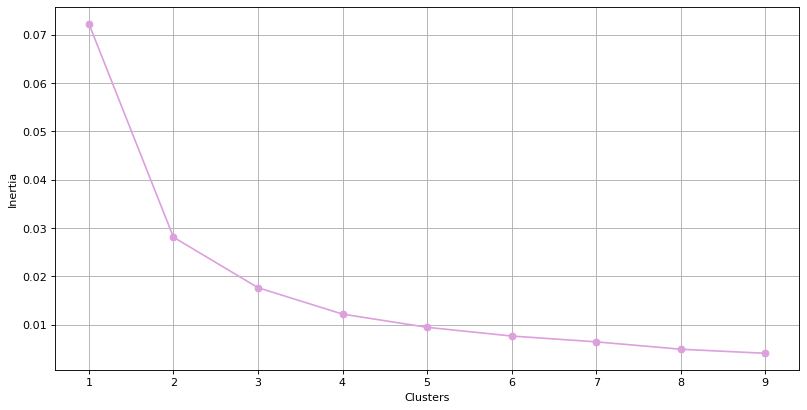

In [22]:
plt.figure(figsize = (12, 6), dpi = 80)
plt.plot(frame['Clusters'], frame['Inertia'], marker = 'o', color = 'plum')
plt.xlabel('Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()

1. cluster number 3, 4 & 5 are ideal cluster number that we can pick any one of them.
2. I'll go with 3 clusters / cluster value.

In [23]:
kmeans = KMeans(n_clusters = 3)
kmeans.fit(data1)
pred = kmeans.predict(data1)

# saving these predicted values in data1's new column say cluster.
data1['cluster'] = pred

### Note.
1. To observe these clusters could be tricky as there are serveral features in the dataset.
2. What we can do in such situations is we can plot 2 features against each other at a time.
3. This would involve lot of repetative code. So we will build functions which'll do the work.

In [24]:
def seg(str_x, str_y, clusters):
    x = []
    y = []
    
    for i in range(clusters):
        x.append(data1[str_x][data1['cluster']==i])
        y.append(data1[str_y][data1['cluster']==i])
  
    return x,y

def plot_clusters(str_x, str_y, clusters):
    plt.figure(figsize = (10,6))
    
    x,y = seg(str_x, str_y, clusters)

    for i in range(clusters):
        plt.scatter(x[i], y[i], label = 'cluster{}'.format(i))
       
    plt.xlabel(str_x)
    plt.ylabel(str_y)
    plt.title(str(str_x+" Vs "+str_y))
    plt.legend()

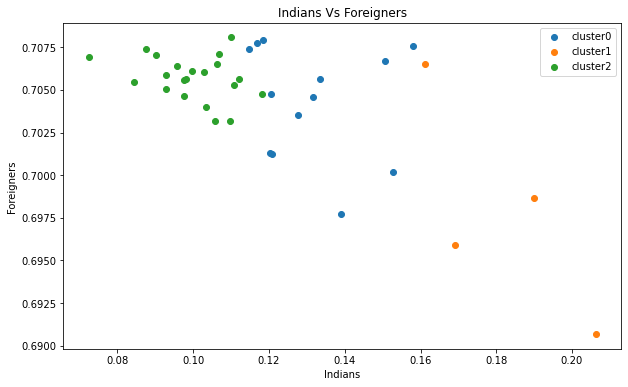

In [25]:
plot_clusters('Indians', 'Foreigners', 3)

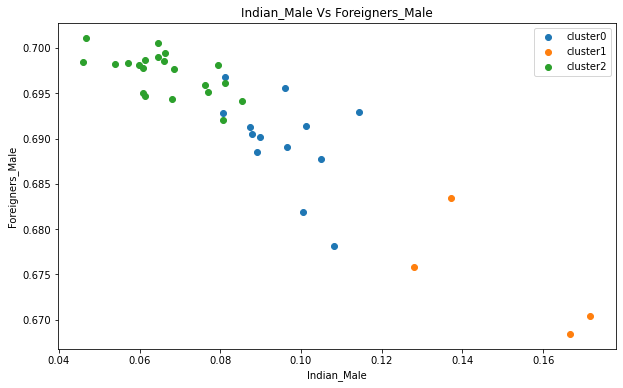

In [26]:
plot_clusters('Indian_Male', 'Foreigners_Male',3)

### Insights : Indian_Male vs Foreigners_Male.
1. We can see that there's a negative correlation between Indian males and foreigner males.
2. Which expected considering the fact, as the foreigners increase in the area Indian population should naturally be lower.

3. ``Green`` cluster represents regions where the indian male are minimum in numbers.
4. ``Blue`` cluster represents the region where Indian male have somewhat significant population.
5. ``Orange`` cluster represents region where the indian male population is among the highest in the dataset.

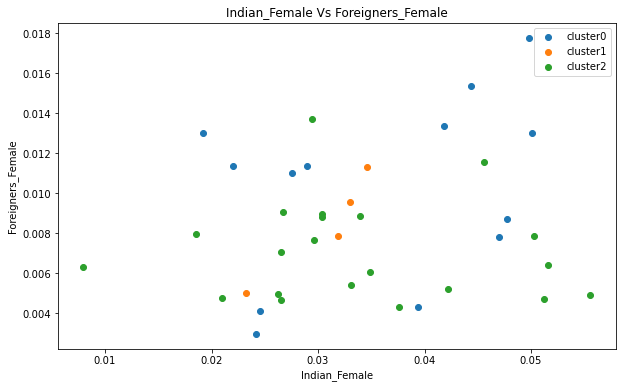

In [27]:
plot_clusters('Indian_Female', 'Foreigners_Female',3)

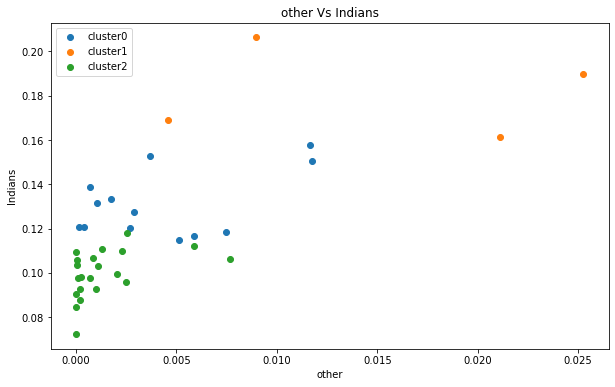

In [28]:
plot_clusters('other', 'Indians',3)